In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
# pip install opencv-python

In [3]:
def load_and_resize_images_from_folder(folder, target_size=(300, 300)):
    images = []
    labels = []
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    # Resize image to target size
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(class_folder)  # Use folder name as label
    return images, labels


In [4]:
# Function to count images in each category
def count_images_per_category(labels):
    category_counts = {}
    for label in labels:
        if label in category_counts:
            category_counts[label] += 1
        else:
            category_counts[label] = 1
    return category_counts

In [5]:
# Define path to the folder containing images
# folder_path = "RiceLeafDiseaseImages"

In [6]:
# Define path to the folder containing images
# folder_path = "/content/drive/MyDrive/DSBA6165_Group_Project/RiceLeafDiseaseImages"

folder_path = "/Users/rishipal/SynologyDrive/Drive/Personal develop/UNCC Health Informatics/UNCC_Courses/09_Spring 2024/DSBA6165/Group Project/RiceLeafDiseaseImages"

In [7]:
# Load and resize images
images, labels = load_and_resize_images_from_folder(folder_path)

In [8]:
# Count images in each category
category_counts = count_images_per_category(labels)

In [9]:
# Print dimensions of each image and count of images in each category
# print("Dimensions of each image:")
# for img in images:
#    print(img.shape)

In [10]:
print("\nNumber of images in each category:")
for category, count in category_counts.items():
    print(f"{category}: {count} images")


Number of images in each category:
Brownspot: 1600 images
Blast: 1440 images
Bacterialblight: 1584 images
Tungro: 1308 images


In [11]:
# Convert labels to numerical format
label_dict = {label: index for index, label in enumerate(np.unique(labels))}
numerical_labels = [label_dict[label] for label in labels]


In [12]:
# Convert images and labels to numpy arrays
import numpy as np
images = np.array(images)
labels = np.array(numerical_labels)

In [13]:
# Perform train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [14]:
# One-hot encode the labels
num_classes = len(np.unique(labels))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [15]:
# Print dimensions of the data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4745, 300, 300, 3)
Shape of X_test: (1187, 300, 300, 3)
Shape of y_train: (4745, 4)
Shape of y_test: (1187, 4)


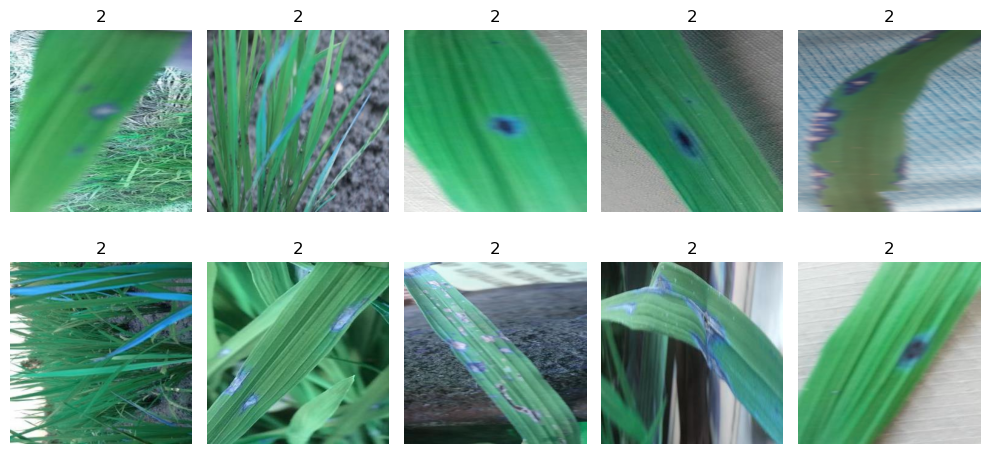

In [16]:
import matplotlib.pyplot as plt

# Define a function to show the image with its label
def show_img(image, label):
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    show_img(X_train[i], labels[y_train[i].argmax()])  # Assuming labels are in one-hot encoded format
plt.tight_layout()
plt.show()


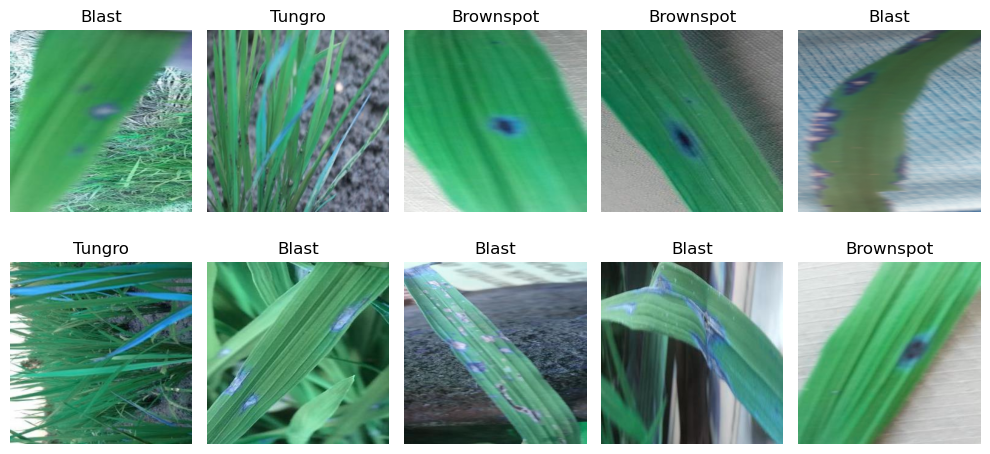

In [17]:
import matplotlib.pyplot as plt

# Define a function to show the image with its label
def show_img(image, label):
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    label_index = np.argmax(y_train[i])
    label_name = list(label_dict.keys())[list(label_dict.values()).index(label_index)]
    show_img(X_train[i], label_name)
plt.tight_layout()
plt.show()


In [18]:
batch_size, height, width, channels = X_train.shape

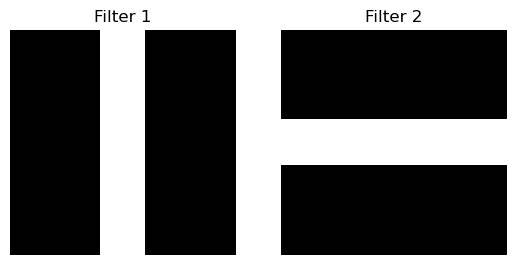

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to show the filter
def show_img(filter):
    plt.imshow(filter)
    plt.axis('off')

# Define the filter
channels = 3  # Assuming RGB images
filters = np.zeros(shape=(5, 5, channels, 2))
filters[:, 2, :, 0] = 1
filters[2, :, :, 1] = 1

# Plot the filters
plt.subplot(1, 2, 1)
show_img(filters[:, :, :, 0])
plt.title('Filter 1')
plt.subplot(1, 2, 2)
show_img(filters[:, :, :, 1])
plt.title('Filter 2')
plt.show()


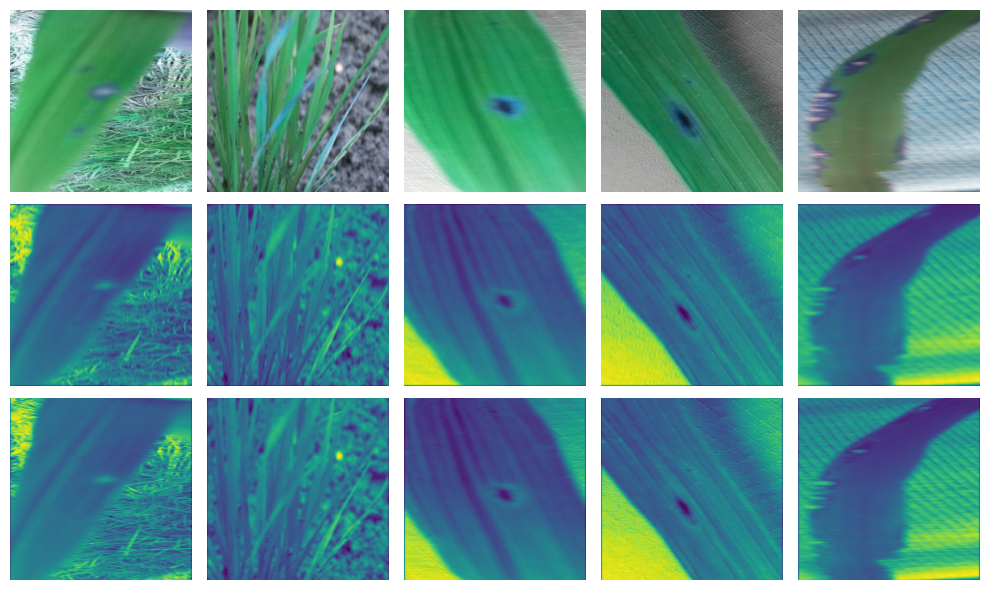

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define a function to show the image
def show_img(image):
    plt.imshow(image)
    plt.axis('off')

# Define the filter
channels = 3  # Assuming RGB images
filters = np.zeros(shape=(5, 5, channels, 2))
filters[:, 2, :, 0] = 1
filters[2, :, :, 1] = 1

# Perform convolution
out = tf.nn.conv2d(X_train[:10], filters, strides=1, padding="SAME")

# Plot the original images and their convolutions
plt.figure(figsize=(10, 6))
for i in range(5):
    # Plot original image
    plt.subplot(3, 5, i + 1)
    show_img(X_train[i])

    # Plot output of the first filter
    plt.subplot(3, 5, i + 6)
    show_img(out[i, :, :, 0])

    # Plot output of the second filter
    plt.subplot(3, 5, i + 11)
    show_img(out[i, :, :, 1])

plt.tight_layout()
plt.show()

In [21]:
# Now you can proceed to build and train your CNN model using X_train, y_train as training data
# and evaluate the model using X_test, y_test
# Example:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



/Users/rishipal/miniconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 341056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    21,827,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,847,300 (83.34 MB)

 Trainable params: 21,847,300 (83.34 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.5060 - loss: 2.1907 - val_accuracy: 0.8147 - val_loss: 0.4642
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 911s 6s/step - accuracy: 0.8820 - loss: 0.3446 - val_accuracy: 0.9200 - val_loss: 0.2205
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 572s 4s/step - accuracy: 0.9609 - loss: 0.1298 - val_accuracy: 0.9452 - val_loss: 0.1450
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.9894 - loss: 0.0435 - val_accuracy: 0.9848 - val_loss: 0.0706
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.9854 - loss: 0.0466 - val_accuracy: 0.9874 - val_loss: 0.0557
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.9987 - loss: 0.0069 - val_accuracy: 0.9924 - val_loss: 0.0440
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9941 - val_loss: 0.0419
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 1.0000 - loss: 3.1739e-04 - val_

Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 1.0000 - loss: 1.2730e-04 - val_accuracy: 0.9941 - val_loss: 0.0474
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 494s 3s/step - accuracy: 1.0000 - loss: 9.9701e-05 - val_accuracy: 0.9933 - val_loss: 0.0485
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 1.0000 - loss: 8.8306e-05 - val_accuracy: 0.9933 - val_loss: 0.0497
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - accuracy: 1.0000 - loss: 6.9225e-05 - val_accuracy: 0.9933 - val_loss: 0.0501
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 1.0000 - loss: 6.8989e-05 - val_accuracy: 0.9933 - val_loss: 0.0503
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 1.0000 - loss: 4.9403e-05 - val_accuracy: 0.9933 - val_loss: 0.0504
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 1.0000 - loss: 4.7315e-05 - val_accuracy: 0.9924 - val_loss: 0.0519
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 1.00

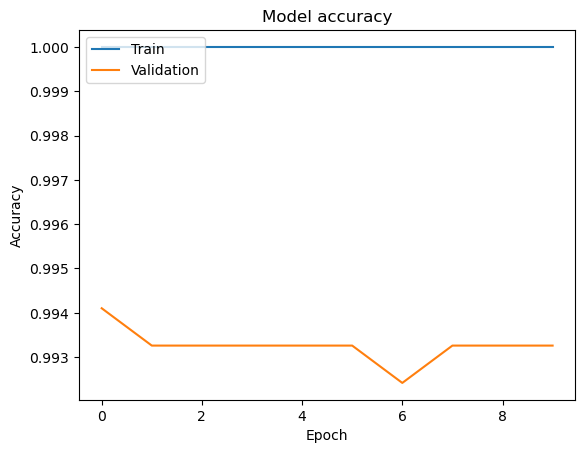

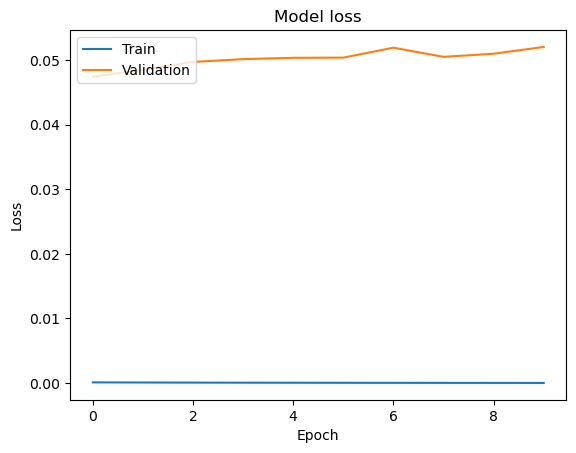

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Test Loss: 0.052012719213962555
Test Accuracy: 0.9932603240013123
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 421ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       315
           1       0.98      1.00      0.99       267
           2       1.00      1.00      1.00       344
           3       1.00      0.99      0.99       261

    accuracy                           0.99      1187
   macro avg       0.99      0.99      0.99      1187
weighted avg       0.99      0.99      0.99      1187

Confusion Matrix:
[[310   5   0   0]
 [  0 267   0   0]
 [  0   0 344   0]
 [  3   0   0 258]]
